# Project 4: West Nile Virus Prediction

____________

# Part 2 - Combined EDA & Data Preparation

### Group 4, SG-DSI-18

In this notebook, we want to merge together all three cleaned datasets and do further exploratory data analysis.

## Problem Statement

As data scientists in the Division of Societal Cures in Epidemiology & New Creative Engineering, we were tasked to use data collected of mosquito samples to effectively predict areas that have the appearance of the West Nile Virus and therefore require deployment of pesticides, in order to manage the budget expenditure efficiently.

## Executive Summary

This project is part of a [Kaggle competition](https://www.kaggle.com/c/predict-west-nile-virus/overview) and explores data collected from various sources, namely:  
* Mosquito trap data collected by the surveillance and control system
* Location data of spraying efforts
* Weather data

The data from these three sources were combined to form a more wholesome dataset for analysis and modelling. The spray data was used to create a feature indicating if each mosquito trap was within the spray zone over a period of 30 days from the spray date. The weather data was added to the combined dataset based on date and location.

Several classifier models were developed, where the hyperparameters were tuned for each model to obtain the best cross-validated AUC scores. Because there were heavy imbalances in the data collected (about 95% of the data indicated no Wnv), an over-sampling method known as SMOTE (Synthetic Minority Over-sampling Technique) was adopted. It was also the reason for optimizing the models on AUC scores instead of accuracy. Comparing the AUC and recall scores, the production model selected was the AdaBoost model. Comparing the train and test accuracy scores of the selected model, there was evidence of slight overfitting of the data but the small difference was acceptable by our means.

We discovered that the time of the day where the sun is out was where the presence of Wnv was the strongest. Also, we observed that the more competent vectors for the spread of Wnv were the culex pipiens and culex restuans species. In order to deploy pesticides in a more cost-efficient way, we recommend spraying in areas where culex pipiens/restuans are most prominent and during the day as the Sun rises where the mosquitoes are most active.

We also explored into deep learning and neural networks. However, our neural network did not outperform the selected model, likely due to the fact it had low complexity. We decided not to further develop the deep learning model since it is not easily interpretable and we had to keep within the limited timeframe of this project.

### Contents:
- [EDA & Data Preparation](#EDA-&-Data-Preparation)

### Import Data & Modules

In [1]:
import pickle
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Display all columns and rows
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
# Import train + spray combined data
infile = open('../datasets/train_spray_final.pkl', 'rb')
train = pickle.load(infile)
infile.close()

In [4]:
train

Date  Week  Year   Trap   Latitude  Longitude  WnvPresent  \
0    2007-05-29    22  2007   T002  41.954690 -87.800991           0   
1    2007-05-29    22  2007   T002  41.954690 -87.800991           0   
2    2007-05-29    22  2007   T007  41.994991 -87.769279           0   
3    2007-05-29    22  2007   T015  41.974089 -87.824812           0   
4    2007-05-29    22  2007   T015  41.974089 -87.824812           0   
5    2007-05-29    22  2007   T045  41.921600 -87.666455           0   
6    2007-05-29    22  2007   T046  41.891118 -87.654491           0   
7    2007-05-29    22  2007   T048  41.867108 -87.654224           0   
8    2007-05-29    22  2007   T048  41.867108 -87.654224           0   
9    2007-05-29    22  2007   T049  41.896282 -87.655232           0   
10   2007-05-29    22  2007   T050  41.919343 -87.694259           0   
11   2007-05-29    22  2007   T054  41.921965 -87.632085           0   
12   2007-05-29    22  2007   T054  41.921965 -87.632085           0   
13   2007-05-29    22  2007   T086  41.688324 -87.676709           0   
14   2007-05-29    22  2007   T086  41.688324 -87.676709           0   
15   2007-05-29    22  2007   T091  41.862292 -87.648860           0   
16   2007-05-29    22  2007   T094  41.720848 -87.666014           0   
17   2007-05-29    22  2007   T096  41.731922 -87.677512           0   
18   2007-05-29    22  2007   T096  41.731922 -87.677512           0   
19   2007-05-29    22  2007   T129  41.891126 -87.611560           0   
20   2007-05-29    22  2007   T129  41.891126 -87.611560           0   
21   2007-05-29    22  2007   T143  41.999129 -87.795585           0   
22   2007-05-29    22  2007   T148  42.017430 -87.687769           0   
23   2007-05-29    22  2007   T153  41.907645 -87.760886           0   
24   2007-05-29    22  2007   T159  41.732984 -87.649642           0   
25   2007-06-05    23  2007   T002  41.954690 -87.800991           0   
26   2007-06-05    23  2007   T002  41.954690 -87.800991           0   
27   2007-06-05    23  2007   T002  41.954690 -87.800991           0   
28   2007-06-05    23  2007   T009  41.981964 -87.812827           0   
29   2007-06-05    23  2007   T011  41.944869 -87.832763           0   
30   2007-06-05    23  2007   T015  41.974089 -87.824812           0   
31   2007-06-05    23  2007   T015  41.974089 -87.824812           0   
32   2007-06-05    23  2007   T016  42.011601 -87.811506           0   
33   2007-06-05    23  2007   T019  41.949830 -87.698457           0   
34   2007-06-05    23  2007   T025  41.979243 -87.750938           0   
35   2007-06-05    23  2007   T028  41.986921 -87.689778           0   
36   2007-06-05    23  2007   T031  41.801498 -87.763416           0   
37   2007-06-05    23  2007   T033  41.906638 -87.701431           0   
38   2007-06-05    23  2007   T045  41.921600 -87.666455           0   
39   2007-06-05    23  2007   T045  41.921600 -87.666455           0   
40   2007-06-05    23  2007   T045  41.921600 -87.666455           0   
41   2007-06-05    23  2007   T046  41.891118 -87.654491           0   
42   2007-06-05    23  2007   T048  41.867108 -87.654224           0   
43   2007-06-05    23  2007   T048  41.867108 -87.654224           0   
44   2007-06-05    23  2007   T048  41.867108 -87.654224           0   
45   2007-06-05    23  2007   T049  41.896282 -87.655232           0   
46   2007-06-05    23  2007   T050  41.919343 -87.694259           0   
47   2007-06-05    23  2007   T050  41.919343 -87.694259           0   
48   2007-06-05    23  2007   T054  41.921965 -87.632085           0   
49   2007-06-05    23  2007   T086  41.688324 -87.676709           0   
50   2007-06-05    23  2007   T089  41.723195 -87.649970           0   
51   2007-06-05    23  2007   T090  41.868077 -87.666901           0   
52   2007-06-05    23  2007   T090  41.868077 -87.666901           0   
53   2007-06-05    23  2007   T092  41.869216 -87.627561           0   
54   2007-06-05    23  2007   T094  41.720848 -87.6

In [5]:
train.shape

(8610, 12)

In [6]:
# Use this to load previously saved .pkl file
infile = open('../datasets/weather_final.pkl', 'rb')
weather = pickle.load(infile)
infile.close()

In [7]:
weather.head()

Station       Date   WeekTavg  WeekWetBulb  WeekWetDry  WeekPrecipTotal  \
0        1 2007-05-01  60.333333         50.0    0.166667         0.000833   
1        2 2007-05-01  60.333333         50.0    0.166667         0.000833   
2        1 2007-05-02  60.333333         50.0    0.166667         0.000833   
3        2 2007-05-02  60.333333         50.0    0.166667         0.000833   
4        1 2007-05-03  60.333333         50.0    0.166667         0.000833   

   WeekStnPressure  WeekSeaLevel  WeekResultSpeed  WeekResultDir  \
0            29.42     30.071667        10.666667            9.5   
1            29.42     30.071667        10.666667            9.5   
2            29.42     30.071667        10.666667            9.5   
3            29.42     30.071667        10.666667            9.5   
4            29.42     30.071667        10.666667            9.5   

   WeekAvgSpeed  WeekSunHours  WeekHumidity   templag1   templag2   templag3  \
0          12.1     14.111111     45.383333  60.333333  59.333333  58.333333   
1          12.1     14.111111     45.383333  60.333333  59.333333  58.333333   
2          12.1     14.111111     45.383333  60.333333  59.333333  58.333333   
3          12.1     14.111111     45.383333  60.333333  59.333333  58.333333   
4          12.1     14.111111     45.383333  60.333333  59.333333  58.333333   

    templag4  wetbulblag1  wetbulblag2  wetbulblag3  wetbulblag4  wetdrylag1  \
0  57.333333         50.0         49.0         48.0         47.0    0.166667   
1  57.333333         50.0         49.0         48.0         47.0    0.166667   
2  57.333333         50.0         49.0         48.0         47.0    0.166667   
3  57.333333         50.0         49.0         48.0         47.0    0.166667   
4  57.333333         50.0         49.0         48.0         47.0    0.166667   

   wetdrylag2  wetdrylag3  wetdrylag4  preciplag1  preciplag2  preciplag3  \
0   -0.833333   -1.833333   -2.833333    0.000833   -0.999167   -1.999167   
1   -0.833333   -1.833333   -2.833333    0.000833   -0.999167   -1.999167   
2   -0.833333   -1.833333   -2.833333    0.000833   -0.999167   -1.999167   
3   -0.833333   -1.833333   -2.833333    0.000833   -0.999167   -1.999167   
4   -0.833333   -1.833333   -2.833333    0.000833   -0.999167   -1.999167   

   preciplag4  stnpressurelag1  stnpressurelag2  stnpressurelag3  \
0   -2.999167            29.42            28.42            27.42   
1   -2.999167            29.42            28.42            27.42   
2   -2.999167            29.42            28.42            27.42   
3   -2.999167            29.42            28.42            27.42   
4   -2.999167            29.42            28.42            27.42   

   stnpressurelag4  sealevellag1  sealevellag2  sealevellag3  sealevellag4  \
0            26.42     30.071667     29.071667     28.071667     27.071667   
1            26.42     30.071667     29.071667     28.071667     27.071667   
2            26.42     30.071667     29.071667     28.071667     27.071667   
3            26.42     30.071667     29.071667     28.071667     27.071667   
4            26.42     30.071667     29.071667     28.071667     27.071667   

   resultspdlag1  resultspdlag2  resultspdlag3  resultspdlag4  resultdirlag1  \
0      10.666667       9.666667       8.666667       7.666667            9.5   
1      10.666667       9.666667       8.666667       7.666667            9.5   
2      10.666667       9.666667       8.666667       7.666667            9.5   
3      10.666667       9.666667       8.666667       7.666667            9.5   
4      10.666667       9.666667       8.666667       7.666667            9.5   

   resultdirlag2  resultdirlag3  resultdirlag4  windlag1  windlag2  windlag3  \
0            8.5            7.5            6.5      12.1      11.1      10.1   
1            8.5            7.5            6.5      12.1      11.1      10.1   
2            8.5            7.5            6.5      12.1      11.1      10.1   
3            8.5     

In [8]:
weather.shape

(2944, 57)

### Combining Datasets 

Below, we will be combining weather, train and spray datasets together. 

In [9]:
#Combining all datasets into one
combined_df = pd.merge(train,weather,on=['Date','Station'],how='left')

In [10]:
#Check the new datasets
combined_df.head(5)

Date  Week  Year  Trap   Latitude  Longitude  WnvPresent  \
0 2007-05-29    22  2007  T002  41.954690 -87.800991           0   
1 2007-05-29    22  2007  T002  41.954690 -87.800991           0   
2 2007-05-29    22  2007  T007  41.994991 -87.769279           0   
3 2007-05-29    22  2007  T015  41.974089 -87.824812           0   
4 2007-05-29    22  2007  T015  41.974089 -87.824812           0   

                  Species  species_no  NumMosquitos  Station  trap_sprayed  \
0  CULEX PIPIENS/RESTUANS         2.0             1        1             0   
1          CULEX RESTUANS         1.0             1        1             0   
2          CULEX RESTUANS         1.0             1        1             0   
3  CULEX PIPIENS/RESTUANS         2.0             1        1             0   
4          CULEX RESTUANS         1.0             4        1             0   

    WeekTavg  WeekWetBulb  WeekWetDry  WeekPrecipTotal  WeekStnPressure  \
0  74.142857    64.714286    0.714286         0.152143        29.267143   
1  74.142857    64.714286    0.714286         0.152143        29.267143   
2  74.142857    64.714286    0.714286         0.152143        29.267143   
3  74.142857    64.714286    0.714286         0.152143        29.267143   
4  74.142857    64.714286    0.714286         0.152143        29.267143   

   WeekSeaLevel  WeekResultSpeed  WeekResultDir  WeekAvgSpeed  WeekSunHours  \
0     29.921429              6.6      17.142857      7.585714     14.980952   
1     29.921429              6.6      17.142857      7.585714     14.980952   
2     29.921429              6.6      17.142857      7.585714     14.980952   
3     29.921429              6.6      17.142857      7.585714     14.980952   
4     29.921429              6.6      17.142857      7.585714     14.980952   

   WeekHumidity   templag1   templag2   templag3   templag4  wetbulblag1  \
0     57.142857  68.714286  61.571429  64.571429  60.333333         58.0   
1     57.142857  68.714286  61.571429  64.571429  60.333333         58.0   
2     57.142857  68.714286  61.571429  64.571429  60.333333         58.0   
3     57.142857  68.714286  61.571429  64.571429  60.333333         58.0   
4     57.142857  68.714286  61.571429  64.571429  60.333333         58.0   

   wetbulblag2  wetbulblag3  wetbulblag4  wetdrylag1  wetdrylag2  wetdrylag3  \
0    50.571429    54.714286         50.0    0.571429    0.428571    0.285714   
1    50.571429    54.714286         50.0    0.571429    0.428571    0.285714   
2    50.571429    54.714286         50.0    0.571429    0.428571    0.285714   
3    50.571429    54.714286         50.0    0.571429    0.428571    0.285714   
4    50.571429    54.714286         50.0    0.571429    0.428571    0.285714   

   wetdrylag4  preciplag1  preciplag2  preciplag3  preciplag4  \
0    0.166667       0.065    0.111429    0.003571    0.000833   
1    0.166667       0.065    0.111429    0.003571    0.000833   
2    0.166667       0.065    0.111429    0.003571    0.000833   
3    0.166667       0.065    0.111429    0.003571    0.000833   
4    0.166667       0.065    0.111429    0.003571    0.000833   

   stnpressurelag1  stnpressurelag2  stnpressurelag3  stnpressurelag4  \
0        29.448571        29.422857        29.402857            29.42   
1        29.448571        29.422857        29.402857            29.42   
2        29.448571        29.422857        29.402857            29.42   
3        29.448571        29.422857        29.402857            29.42   
4        29.448571        29.422857        29.402857            29.42   

   sealevellag1  sealevellag2  sealevellag3  sealevellag4  resultspdlag1  \
0     30.097143         30.08     30.062857     30.071667       8.042857   
1     30.097143         30.08     30.062857     30.071667       8.042857   
2     30.097143         30.08     30.062857     30.071667       8.042857   
3     30.097143         30.08     30.062857     30.071667       8.042857   
4     30.097143         30.08     30.062857     30.07166

In [11]:
combined_df.shape

(8610, 67)

Currently, we have 67 features. We will be studying the relationship between the features.

In [12]:
#Looking for null values
combined_df.isnull().sum()

Date               0
Week               0
Year               0
Trap               0
Latitude           0
Longitude          0
WnvPresent         0
Species            0
species_no         0
NumMosquitos       0
Station            0
trap_sprayed       0
WeekTavg           0
WeekWetBulb        0
WeekWetDry         0
WeekPrecipTotal    0
WeekStnPressure    0
WeekSeaLevel       0
WeekResultSpeed    0
WeekResultDir      0
WeekAvgSpeed       0
WeekSunHours       0
WeekHumidity       0
templag1           0
templag2           0
templag3           0
templag4           0
wetbulblag1        0
wetbulblag2        0
wetbulblag3        0
wetbulblag4        0
wetdrylag1         0
wetdrylag2         0
wetdrylag3         0
wetdrylag4         0
preciplag1         0
preciplag2         0
preciplag3         0
preciplag4         0
stnpressurelag1    0
stnpressurelag2    0
stnpressurelag3    0
stnpressurelag4    0
sealevellag1       0
sealevellag2       0
sealevellag3       0
sealevellag4       0
resultspdlag1

In [13]:
#Looking at the description of the features
combined_df.describe().T

count         mean        std          min          25%  \
Week             8610.0    31.297793   4.792603    21.000000    28.000000   
Year             8610.0  2009.713821   2.338148  2007.000000  2007.000000   
Latitude         8610.0    41.844422   0.107076    41.644612    41.750498   
Longitude        8610.0   -87.695237   0.084921   -87.930995   -87.752411   
WnvPresent       8610.0     0.053078   0.224202     0.000000     0.000000   
species_no       8610.0     1.649129   0.546695     0.000000     1.000000   
NumMosquitos     8610.0    15.683972  68.560634     1.000000     2.000000   
Station          8610.0     1.813240   0.389741     1.000000     2.000000   
trap_sprayed     8610.0     0.010685   0.102822     0.000000     0.000000   
WeekTavg         8610.0    72.350041   5.981809    53.571429    69.714286   
WeekWetBulb      8610.0    63.901344   5.285593    48.285714    61.142857   
WeekWetDry       8610.0     0.439904   0.232519     0.000000     0.285714   
WeekPrecipTotal  8610.0     0.125659   0.134558     0.000000     0.042143   
WeekStnPressure  8610.0    29.323086   0.084462    29.092857    29.265714   
WeekSeaLevel     8610.0    29.966310   0.086825    29.731429    29.902857   
WeekResultSpeed  8610.0     6.069842   1.309032     3.071429     5.085714   
WeekResultDir    8610.0    16.104463   4.054661     6.000000    13.142857   
WeekAvgSpeed     8610.0     7.794130   1.138519     5.271429     6.857143   
WeekSunHours     8610.0    13.924634   1.088326    11.290476    13.128571   
WeekHumidity     8610.0    61.426697   7.378303    49.185714    55.542857   
templag1         8610.0    72.415032   5.636381    59.571429    69.714286   
templag2         8610.0    73.036187   5.884601    56.857143    69.857143   
templag3         8610.0    72.381666   6.096654    56.857143    69.714286   
templag4         8610.0    72.256435   5.898758    56.000000    69.857143   
wetbulblag1      8610.0    63.872623   5.008013    51.714286    61.571429   
wetbulblag2      8610.0    64.230612   5.364910    50.142857    61.571429   
wetbulblag3      8610.0    63.584155   5.331992    50.142857    61.142857   
wetbulblag4      8610.0    63.545307   5.288922    47.333333    62.142857   
wetdrylag1       8610.0     0.456147   0.237902     0.000000     0.285714   
wetdrylag2       8610.0     0.439107   0.236458     0.000000     0.285714   
wetdrylag3       8610.0     0.435009   0.212688     0.000000     0.285714   
wetdrylag4       8610.0     0.469053   0.215457     0.000000     0.333333   
preciplag1       8610.0     0.111232   0.119664     0.000000     0.026429   
preciplag2       8610.0     0.103867   0.115482     0.000000     0.024286   
preciplag3       8610.0     0.125867   0.127702     0.000000     0.032143   
preciplag4       8610.0     0.126624   0.122260     0.000714     0.025714   
stnpressurelag1  8610.0    29.322851   0.084939    29.092857    29.251429   
stnpressurelag2  8610.0    29.324700   0.093163    29.135714    29.250000   
stnpressurelag3  8610.0    29.311093   0.096090    29.092857    29.251429   
stnpressurelag4  8610.0    29.300471   0.083525    29.124286    29.237143   
sealevellag1     8610.0    29.967146   0.087275    29.731429    29.895714   
sealevellag2     8610.0    29.967464   0.097111    29.771429    29.891429   
sealevellag3     8610.0    29.954469   0.099302    29.731429    29.895714   
sealevellag4     8610.0    29.944684   0.084739    29.771429    29.880000   
resultspdlag1    8610.0     6.203831   1.407045     3.071429     5.428571   
resultspdlag2    8610.0     6.241213   1.520903     3.071429     5.100000   
resultspdlag3    8610.0     6.447496   1.412796     3.071429     5.442857   
resultspdlag4    8610.0     6.339655   1.411177     3.071429     5.457143   
resultdirlag1    8610.0    15.805757   4.204391     6.142857    12.428571   
resultdirlag2    8610.0    15.805625   4.183903     6.000000    13.142857   
resultdirlag3    8610.0    15.623776   3.895908     6.000000    12.285714   
resultdirlag4 

Apparently, there are some features with all zero values. We will be dropping them. 

In [14]:
# Save new dataset as a pickle file
outfile = open('../datasets/combined_final.pkl','wb')
pickle.dump(combined_df, outfile)
outfile.close()

## EDA & Data Preparation

### Total Number of Mosquitoes

Because the spread of Wnv is very relatable to the number of mosquitoes, we want to study how every other feature is correlated or affects the number of mosquitoes.

In [15]:
combined_df.describe()

Week         Year     Latitude    Longitude   WnvPresent  \
count  8610.000000  8610.000000  8610.000000  8610.000000  8610.000000   
mean     31.297793  2009.713821    41.844422   -87.695237     0.053078   
std       4.792603     2.338148     0.107076     0.084921     0.224202   
min      21.000000  2007.000000    41.644612   -87.930995     0.000000   
25%      28.000000  2007.000000    41.750498   -87.752411     0.000000   
50%      31.000000  2009.000000    41.857402   -87.694991     0.000000   
75%      35.000000  2011.000000    41.944869   -87.642984     0.000000   
max      41.000000  2013.000000    42.017430   -87.531635     1.000000   

        species_no  NumMosquitos      Station  trap_sprayed     WeekTavg  \
count  8610.000000   8610.000000  8610.000000   8610.000000  8610.000000   
mean      1.649129     15.683972     1.813240      0.010685    72.350041   
std       0.546695     68.560634     0.389741      0.102822     5.981809   
min       0.000000      1.000000     1.000000      0.000000    53.571429   
25%       1.000000      2.000000     2.000000      0.000000    69.714286   
50%       2.000000      4.000000     2.000000      0.000000    72.571429   
75%       2.000000     11.000000     2.000000      0.000000    76.428571   
max       2.000000   2206.000000     2.000000      1.000000    84.142857   

       WeekWetBulb   WeekWetDry  WeekPrecipTotal  WeekStnPressure  \
count  8610.000000  8610.000000      8610.000000      8610.000000   
mean     63.901344     0.439904         0.125659        29.323086   
std       5.285593     0.232519         0.134558         0.084462   
min      48.285714     0.000000         0.000000        29.092857   
25%      61.142857     0.285714         0.042143        29.265714   
50%      64.571429     0.428571         0.078571        29.328571   
75%      67.714286     0.571429         0.155714        29.380000   
max      73.285714     1.000000         0.540000        29.545714   

       WeekSeaLevel  WeekResultSpeed  WeekResultDir  WeekAvgSpeed  \
count   8610.000000      8610.000000    8610.000000   8610.000000   
mean      29.966310         6.069842      16.104463      7.794130   
std        0.086825         1.309032       4.054661      1.138519   
min       29.731429         3.071429       6.000000      5.271429   
25%       29.902857         5.085714      13.142857      6.857143   
50%       29.967143         6.314286      16.571429      7.700000   
75%       30.021429         6.985714      19.285714      8.557143   
max       30.204286        10.014286      26.857143     10.971429   

       WeekSunHours  WeekHumidity     templag1     templag2     templag3  \
count   8610.000000   8610.000000  8610.000000  8610.000000  8610.000000   
mean      13.924634     61.426697    72.415032    73.036187    72.381666   
std        1.088326      7.378303     5.636381     5.884601     6.096654   
min       11.290476     49.185714    59.571429    56.857143    56.857143   
25%       13.128571     55.542857    69.714286    69.857143    69.714286   
50%       14.219048     61.114286    72.285714    72.571429    72.571429   
75%       14.935714     65.871429    75.142857    76.857143    76.428571   
max       15.209524     81.328571    85.571429    85.571429    85.571429   

          templag4  wetbulblag1  wetbulblag2  wetbulblag3  wetbulblag4  \
count  8610.000000  8610.000000  8610.000000  8610.000000  8610.000000   
mean     72.256435    63.872623    64.230612    63.584155    63.545307   
std       5.898758     5.008013     5.364910     5.331992     5.288922   
min      56.000000    51.714286    50.142857    50.142857    47.333333   
25%      69.857143    61.571429    61.571429    61.142857    62.142857   
50%      73.142857    64.000000    64.285714    64.285714    64.285714   
75%      76.285714    66.142857    67.571429    66.285714    66.285714   
max      85.571429    75.285714    75.285714    75.285714    75.285714   

        wetdrylag1   wetdrylag2   wetdrylag3   wetdrylag4   precip

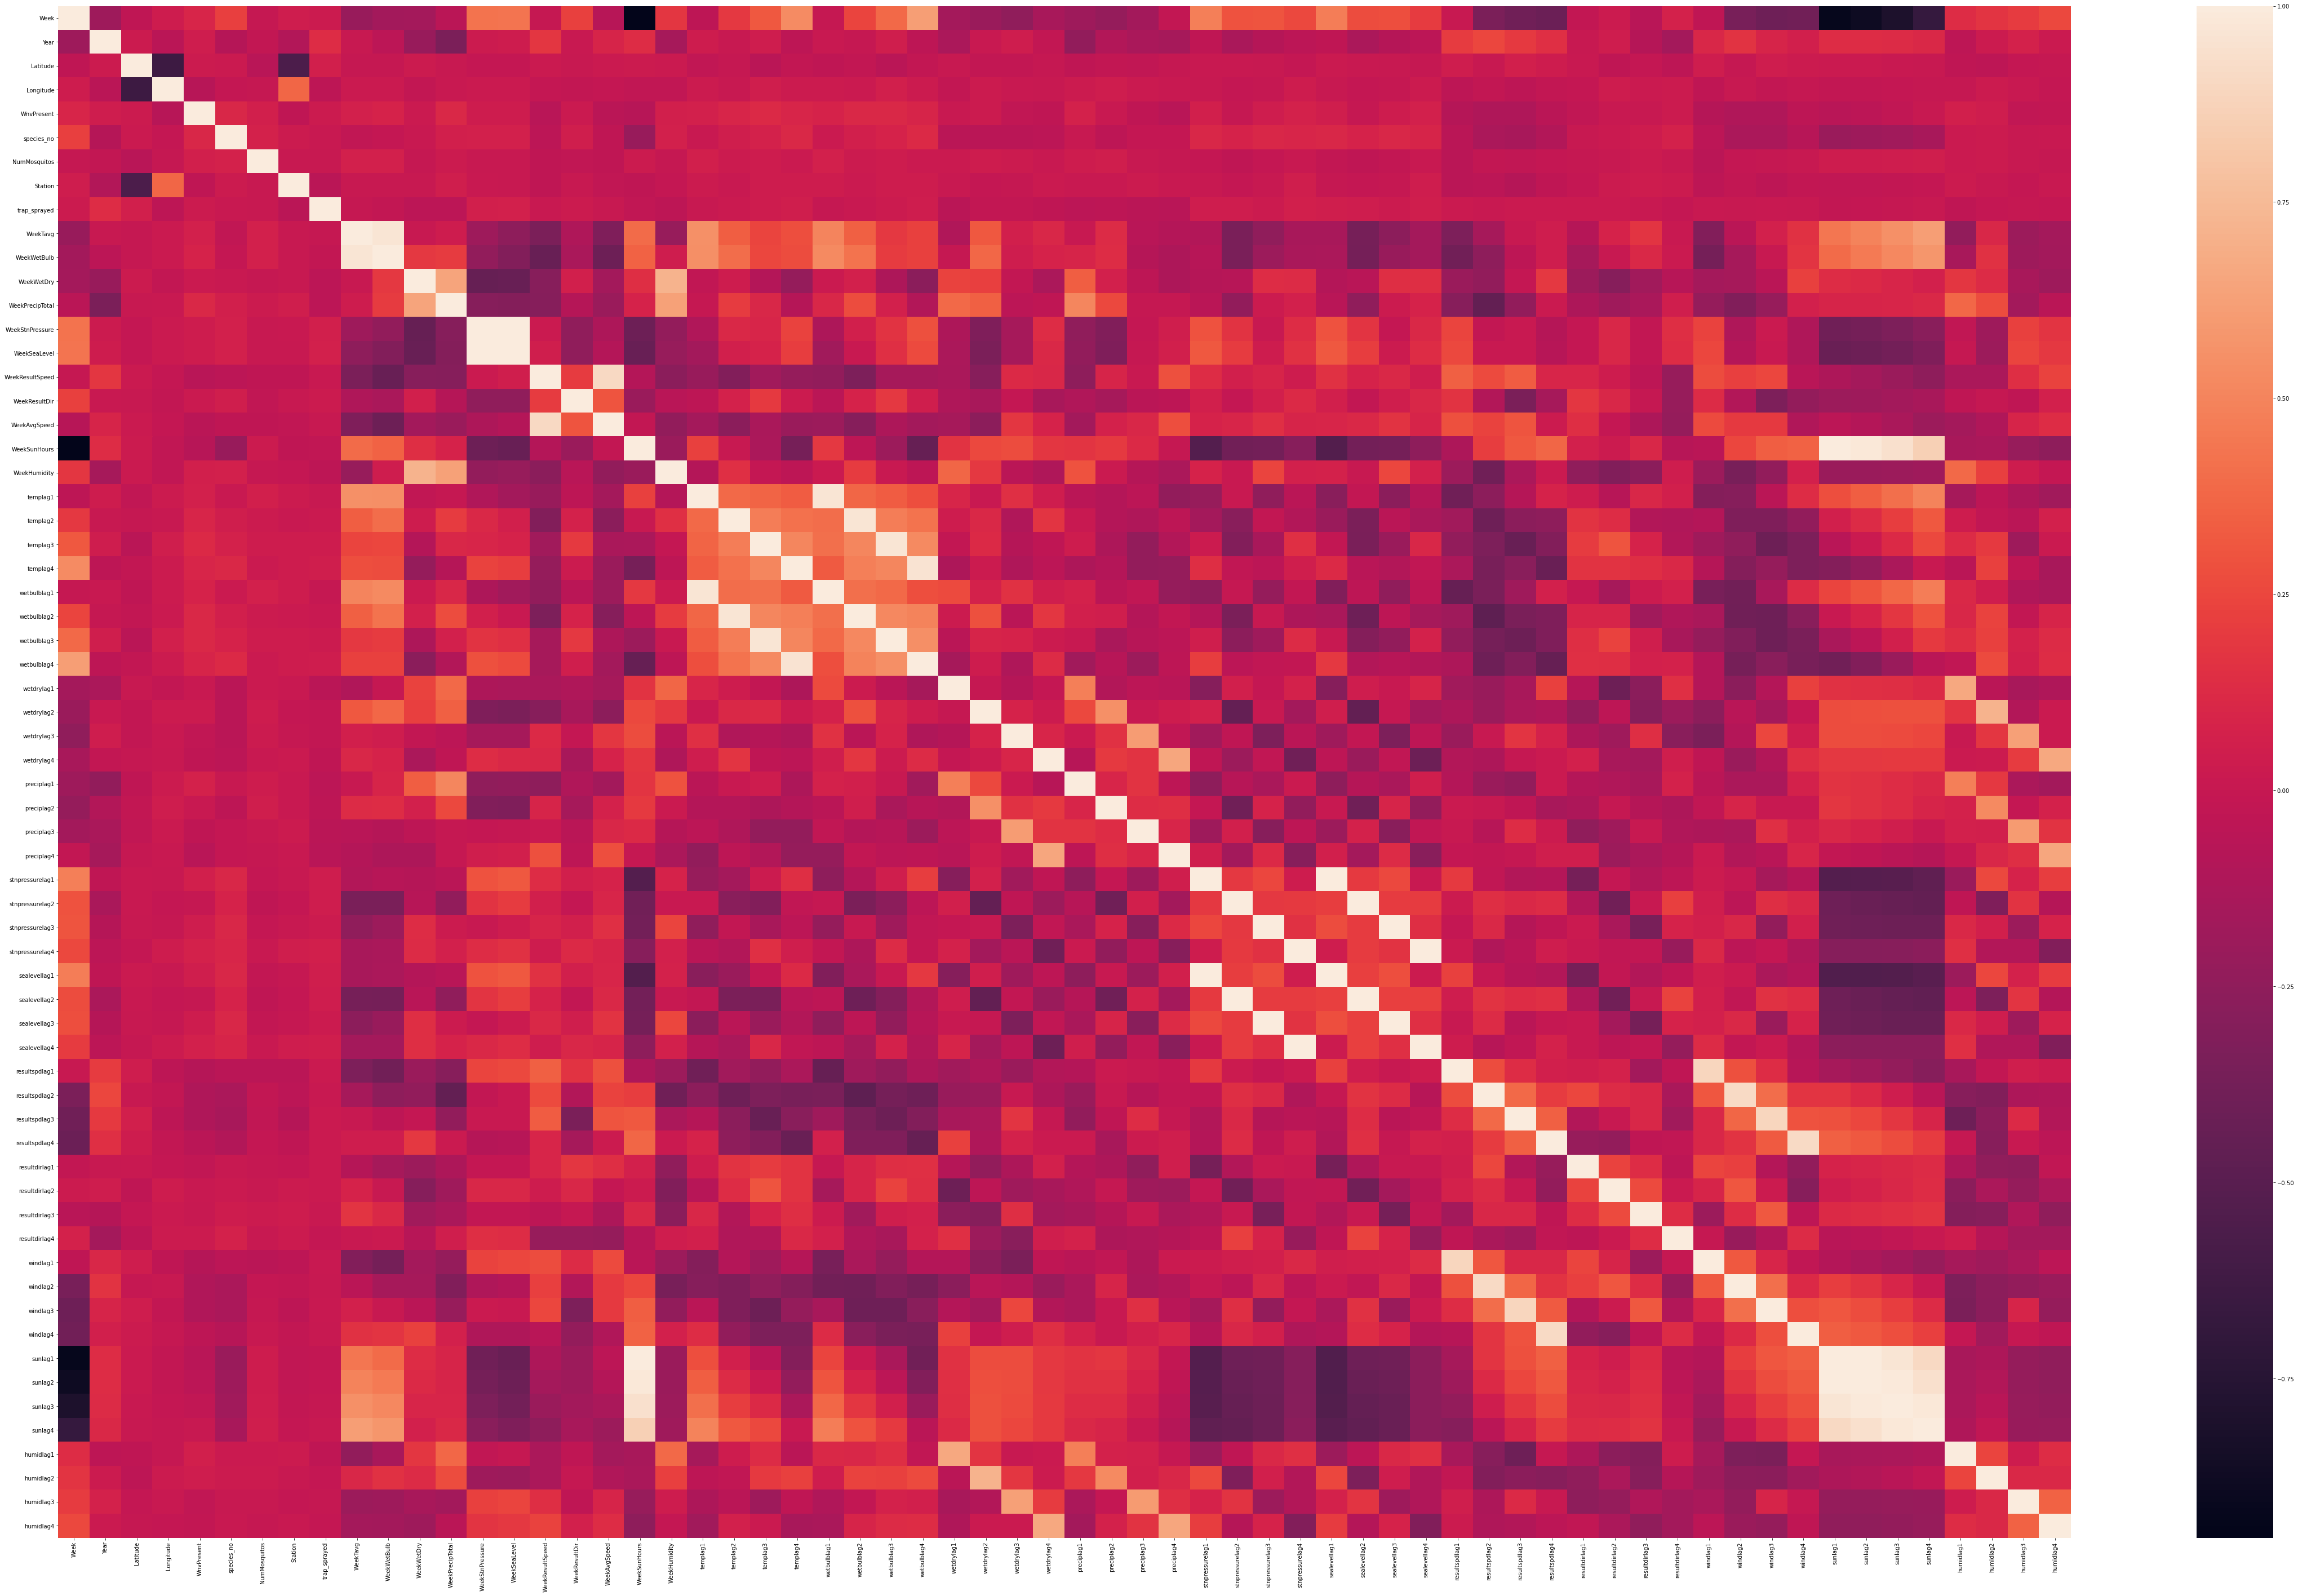

In [16]:
#Plotting a heatmap for overall features
plt.figure(figsize=(80,50))
sns.heatmap(round(combined_df.corr(),3))

As there are many features, it is harder to visualize overall. We will split our studies into two part, total number of mosquitoes and West Nile Virus mosquitoes.

Below, we will be studying the relationship between the total number of mosquitoes and the weekly average weather condition metrics. Based on this [source](https://www.orkin.com/other/mosquitoes/activity#:~:text=Humidity%3A%20Relative%20humidity%20is%20important,and%20may%20even%20cause%20mortality), mosquitoes thrived on conditions such as wind, temperature, humidity, precipitation and sunlight. We will look into these five conditions and the other weather condition metrics.

In [17]:
combined_df.head()

Date  Week  Year  Trap   Latitude  Longitude  WnvPresent  \
0 2007-05-29    22  2007  T002  41.954690 -87.800991           0   
1 2007-05-29    22  2007  T002  41.954690 -87.800991           0   
2 2007-05-29    22  2007  T007  41.994991 -87.769279           0   
3 2007-05-29    22  2007  T015  41.974089 -87.824812           0   
4 2007-05-29    22  2007  T015  41.974089 -87.824812           0   

                  Species  species_no  NumMosquitos  Station  trap_sprayed  \
0  CULEX PIPIENS/RESTUANS         2.0             1        1             0   
1          CULEX RESTUANS         1.0             1        1             0   
2          CULEX RESTUANS         1.0             1        1             0   
3  CULEX PIPIENS/RESTUANS         2.0             1        1             0   
4          CULEX RESTUANS         1.0             4        1             0   

    WeekTavg  WeekWetBulb  WeekWetDry  WeekPrecipTotal  WeekStnPressure  \
0  74.142857    64.714286    0.714286         0.152143        29.267143   
1  74.142857    64.714286    0.714286         0.152143        29.267143   
2  74.142857    64.714286    0.714286         0.152143        29.267143   
3  74.142857    64.714286    0.714286         0.152143        29.267143   
4  74.142857    64.714286    0.714286         0.152143        29.267143   

   WeekSeaLevel  WeekResultSpeed  WeekResultDir  WeekAvgSpeed  WeekSunHours  \
0     29.921429              6.6      17.142857      7.585714     14.980952   
1     29.921429              6.6      17.142857      7.585714     14.980952   
2     29.921429              6.6      17.142857      7.585714     14.980952   
3     29.921429              6.6      17.142857      7.585714     14.980952   
4     29.921429              6.6      17.142857      7.585714     14.980952   

   WeekHumidity   templag1   templag2   templag3   templag4  wetbulblag1  \
0     57.142857  68.714286  61.571429  64.571429  60.333333         58.0   
1     57.142857  68.714286  61.571429  64.571429  60.333333         58.0   
2     57.142857  68.714286  61.571429  64.571429  60.333333         58.0   
3     57.142857  68.714286  61.571429  64.571429  60.333333         58.0   
4     57.142857  68.714286  61.571429  64.571429  60.333333         58.0   

   wetbulblag2  wetbulblag3  wetbulblag4  wetdrylag1  wetdrylag2  wetdrylag3  \
0    50.571429    54.714286         50.0    0.571429    0.428571    0.285714   
1    50.571429    54.714286         50.0    0.571429    0.428571    0.285714   
2    50.571429    54.714286         50.0    0.571429    0.428571    0.285714   
3    50.571429    54.714286         50.0    0.571429    0.428571    0.285714   
4    50.571429    54.714286         50.0    0.571429    0.428571    0.285714   

   wetdrylag4  preciplag1  preciplag2  preciplag3  preciplag4  \
0    0.166667       0.065    0.111429    0.003571    0.000833   
1    0.166667       0.065    0.111429    0.003571    0.000833   
2    0.166667       0.065    0.111429    0.003571    0.000833   
3    0.166667       0.065    0.111429    0.003571    0.000833   
4    0.166667       0.065    0.111429    0.003571    0.000833   

   stnpressurelag1  stnpressurelag2  stnpressurelag3  stnpressurelag4  \
0        29.448571        29.422857        29.402857            29.42   
1        29.448571        29.422857        29.402857            29.42   
2        29.448571        29.422857        29.402857            29.42   
3        29.448571        29.422857        29.402857            29.42   
4        29.448571        29.422857        29.402857            29.42   

   sealevellag1  sealevellag2  sealevellag3  sealevellag4  resultspdlag1  \
0     30.097143         30.08     30.062857     30.071667       8.042857   
1     30.097143         30.08     30.062857     30.071667       8.042857   
2     30.097143         30.08     30.062857     30.071667       8.042857   
3     30.097143         30.08     30.062857     30.071667       8.042857   
4     30.097143         30.08     30.062857     30.07166

In [18]:
#Getting data for weather conditions and number of mosquitoes
correlation_nomosquitoes= combined_df.drop(columns = (col for col in combined_df if col not in 
                              ['WnvPresent','NumMosquitos','WeekTavg','WeekWetBulb','WeekWetDry','WeekPrecipTotal','WeekStnPressure',
                               'WeekSeaLevel','WeekResultSpeed','WeekResultDir','WeekAvgSpeed','WeekSunHours','WeekHumidity']))
correlation_nomosquitoes.head()

WnvPresent  NumMosquitos   WeekTavg  WeekWetBulb  WeekWetDry  \
0           0             1  74.142857    64.714286    0.714286   
1           0             1  74.142857    64.714286    0.714286   
2           0             1  74.142857    64.714286    0.714286   
3           0             1  74.142857    64.714286    0.714286   
4           0             4  74.142857    64.714286    0.714286   

   WeekPrecipTotal  WeekStnPressure  WeekSeaLevel  WeekResultSpeed  \
0         0.152143        29.267143     29.921429              6.6   
1         0.152143        29.267143     29.921429              6.6   
2         0.152143        29.267143     29.921429              6.6   
3         0.152143        29.267143     29.921429              6.6   
4         0.152143        29.267143     29.921429              6.6   

   WeekResultDir  WeekAvgSpeed  WeekSunHours  WeekHumidity  
0      17.142857      7.585714     14.980952     57.142857  
1      17.142857      7.585714     14.980952     57.142857  
2      17.142857      7.585714     14.980952     57.142857  
3      17.142857      7.585714     14.980952     57.142857  
4      17.142857      7.585714     14.980952     57.142857

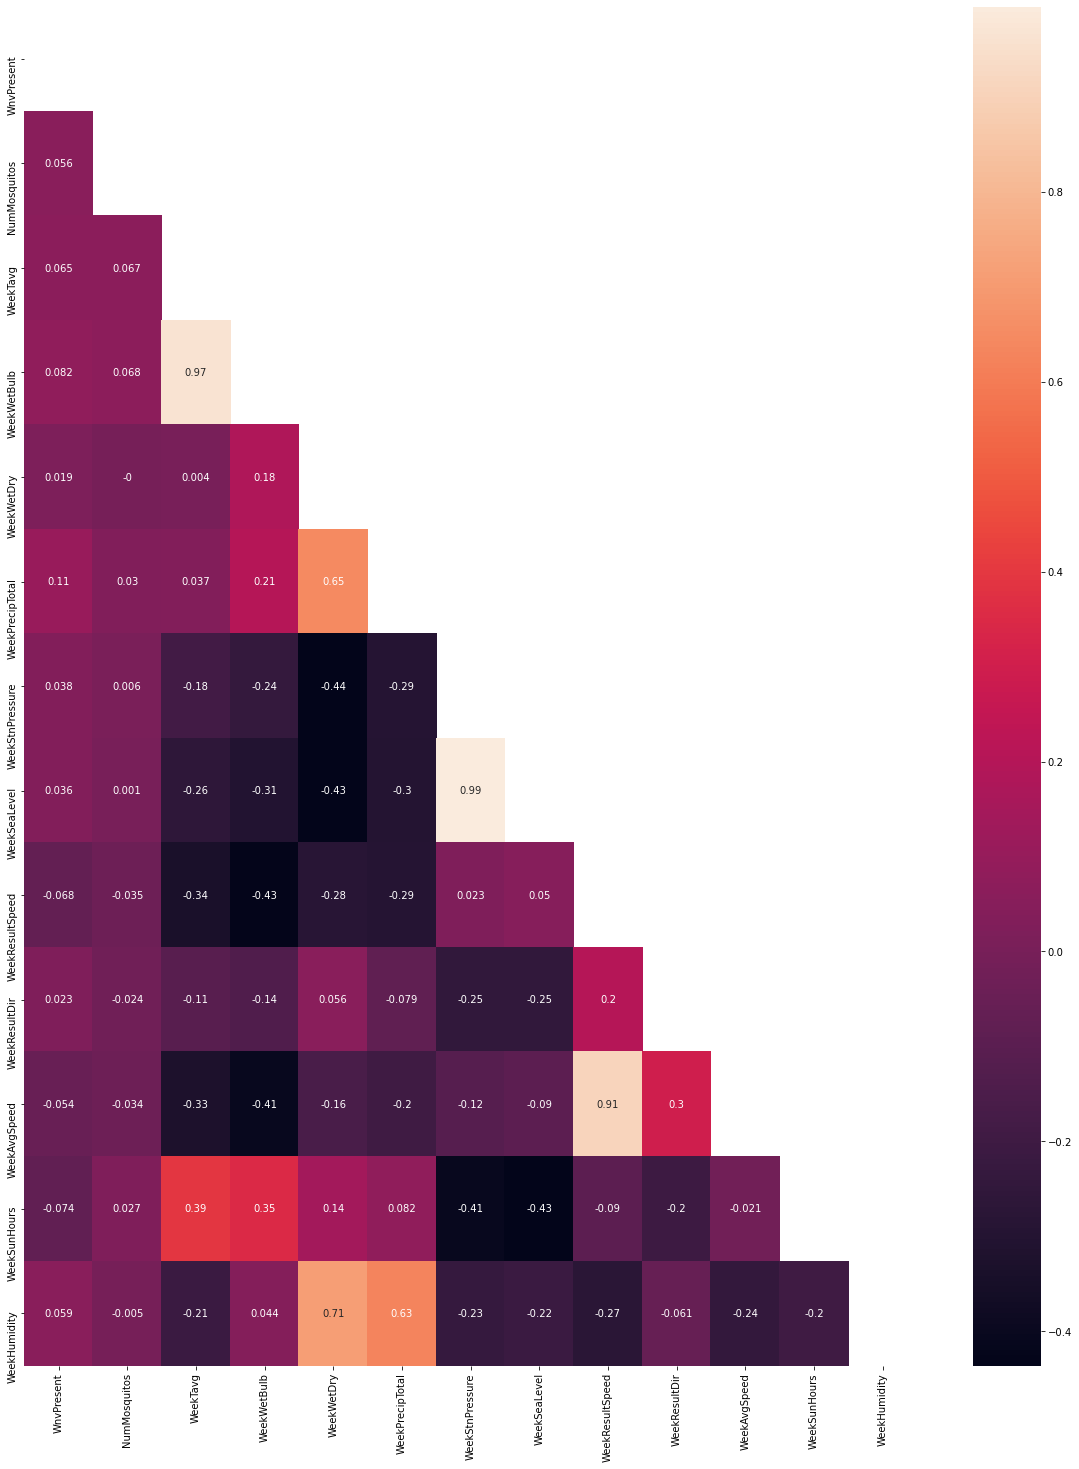

In [19]:
#Plotting the correlation for mosquitoes and weather conditions
plt.figure(figsize=(20,25))
mask = np.triu(np.ones_like(correlation_nomosquitoes.corr(), dtype=np.bool))
sns.heatmap(round(correlation_nomosquitoes.corr(),3),annot=True,mask=mask)

Based on the above correlation table, the conditions are not positively or negatively correlated with the number of mosquitoes. However, out of the five main conditions which affect mosquitoes, Tavg (Average Temperature) is the most positively correlated to the number of mosquitoes. Conversely, humidity is the most negatively correlated to the number of mosquitoes.

### Mosquitoes Carrying West Nile Virus 

Now, let's study the data based on the presence of the virus. Similarly, we will look at the five conditions to study the relation between them and mosquitoes with Wnv present.

In [20]:
#Creating a dataset based on the presence of the virus
wnvpresent_df = combined_df.loc[combined_df['WnvPresent']==1]

In [21]:
wnvpresent_df.shape

(457, 67)

In [22]:
#Getting data based on weather conditions and WNV mosquitoes
wnvpresent_df.drop(columns = (col for col in wnvpresent_df if col not in 
                              ['WnvPresent','NumMosquitos','WeekTavg','WeekWetBulb','WeekWetDry','WeekPrecipTotal','WeekStnPressure',
                               'WeekSeaLevel','WeekResultSpeed','WeekResultDir','WeekAvgSpeed','WeekSunHours','WeekHumidity','Station']),inplace=True)

C:\Users\riche\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Based on the table above, correlation between Wnv Mosquitoes and the weather conditions are quite similar. Let's look at the features and its relation with Wnv Mosquitoes seperately.

#### Weather Station & Wnv Mosquitoes 

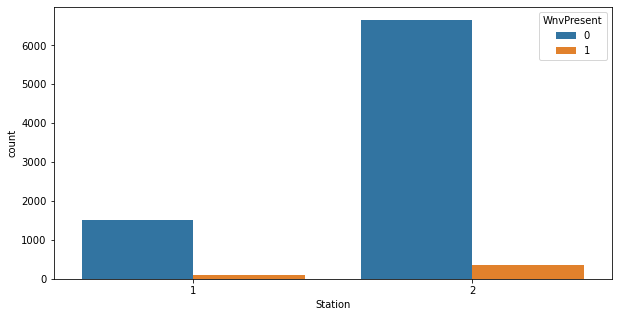

In [23]:
#Looking for mosquitoes and virus presence between the two weather station
plt.figure(figsize=(10,5))
sns.countplot(data = combined_df,x = 'Station',hue='WnvPresent');

Apparently, most of the mosquitoes with the virus are near Station 2. It suggests that the weather conditions captured by Station 2 are more favorable towards mosquito activity and hence the spreading of Wnv.

#### Tavg & Wnv Mosquitoes

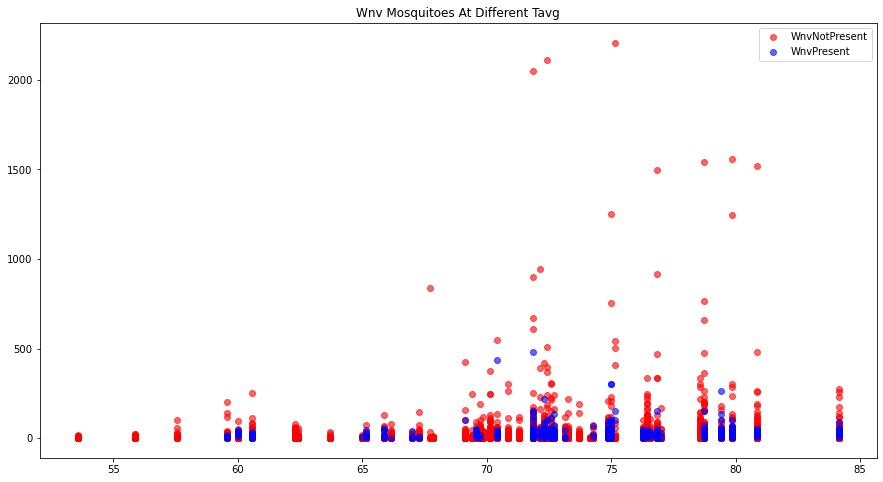

In [24]:
#Plot for mosquito at different Tavg
plt.figure(figsize=(15,8))
plt.scatter(data=combined_df.loc[combined_df['WnvPresent']==0], x = 'WeekTavg', y='NumMosquitos', c='r', alpha=0.6, label='WnvNotPresent')
plt.scatter(data=combined_df.loc[combined_df['WnvPresent']==1], x = 'WeekTavg', y='NumMosquitos', c='b', alpha=0.6, label='WnvPresent')
plt.title("Wnv Mosquitoes At Different Tavg")
plt.legend();

Based on the plot above, it seemed that most of the mosquitoes with virus appear around 70 to 85 Tavg. Some appear at around 55 Fahrenheit. Based on this [source](https://swatmosquitosystems.com/2019/10/cold-weather-temperature-kills-mosquitoes/), mosquitoes tend to die at temperature below 50 degrees Fahrenheit, which explains the lower counts below 50 degrees.

#### Wind Speed & Wnv Mosquitoes

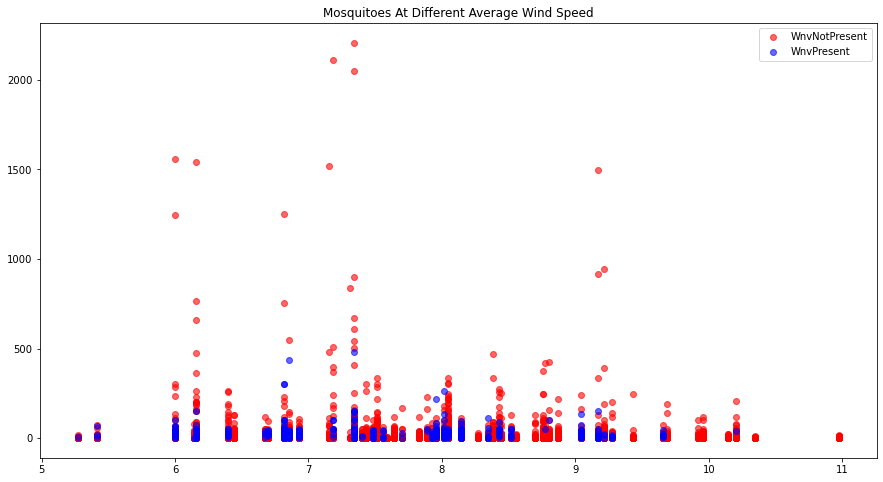

In [25]:
#Plot for mosquitoes at different wind 
plt.figure(figsize=(15,8))
plt.scatter(data=combined_df.loc[combined_df['WnvPresent']==0], x = 'WeekAvgSpeed', y='NumMosquitos', c='r', alpha=0.6, label='WnvNotPresent')
plt.scatter(data=combined_df.loc[combined_df['WnvPresent']==1], x = 'WeekAvgSpeed', y='NumMosquitos', c='b', alpha=0.6, label='WnvPresent')
plt.title("Mosquitoes At Different Average Wind Speed")
plt.legend();

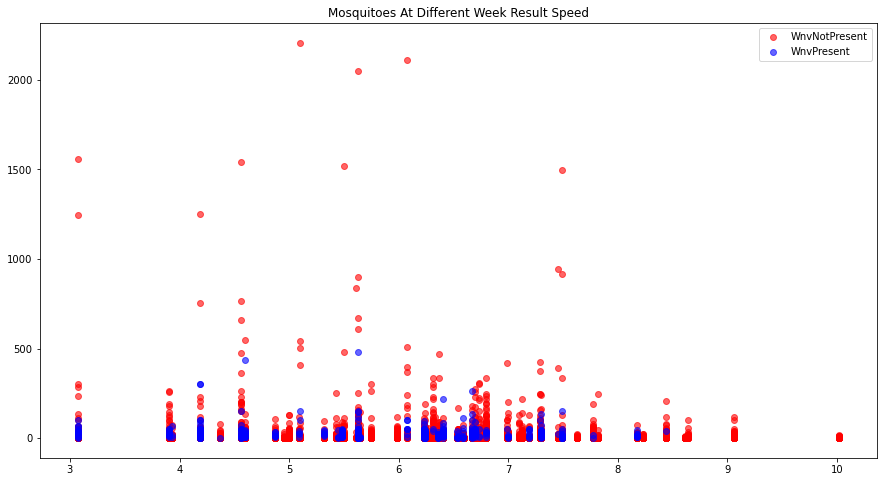

In [26]:
#Plot for mosquitoes at different result wind
plt.figure(figsize=(15,8))
plt.scatter(data=combined_df.loc[combined_df['WnvPresent']==0], x = 'WeekResultSpeed', y='NumMosquitos', c='r', alpha=0.6, label='WnvNotPresent')
plt.scatter(data=combined_df.loc[combined_df['WnvPresent']==1], x = 'WeekResultSpeed', y='NumMosquitos', c='b', alpha=0.6, label='WnvPresent')
plt.title("Mosquitoes At Different Week Result Speed")
plt.legend();

Most of the mosquitoes appears at windspeed below 11. It is also known that mosquitoes are unable to thrive at higher wind speed as it will affect their flight.

#### Humidity & Wnv Mosquitoes

Text(0.5, 1.0, 'Mosquitoes & Weekly Humidity Level')

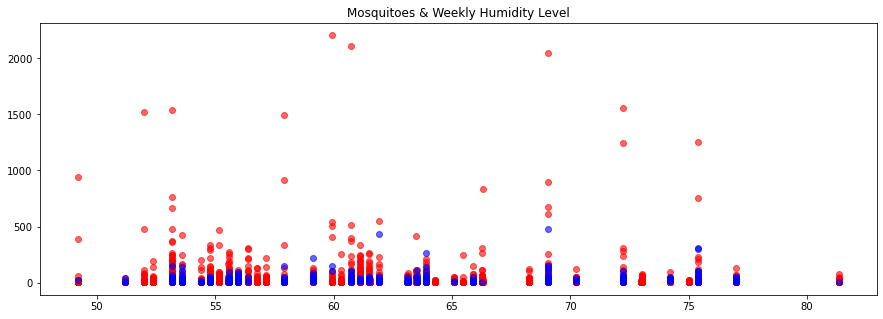

In [27]:
#Looking at the the presence of mosquitoes at different humidity level
plt.figure(figsize=(15,5))
plt.scatter(data=combined_df.loc[combined_df['WnvPresent']==0], x = 'WeekHumidity', y='NumMosquitos', c='r', alpha=0.6, label='WnvNotPresent')
plt.scatter(data=combined_df.loc[combined_df['WnvPresent']==1], x = 'WeekHumidity', y='NumMosquitos', c='b', alpha=0.6, label='WnvPresent')
plt.title('Mosquitoes & Weekly Humidity Level' )

In [28]:
#Range of humidity level
combined_df['WeekHumidity'].describe()

count    8610.000000
mean       61.426697
std         7.378303
min        49.185714
25%        55.542857
50%        61.114286
75%        65.871429
max        81.328571
Name: WeekHumidity, dtype: float64

Most of mosquitoes appear at humidity level of 55 - 65. However, Wnv mosquitoes' presences are spread out from humidity level of 49 to 81. Generally, high humidity conditions favor mosquito activity.

#### Rain & Wnv Mosquitoes

We know that wet conditions are more favored by mosquitoes, so we want to look at the relation between precipitation and number of mosquitoes.

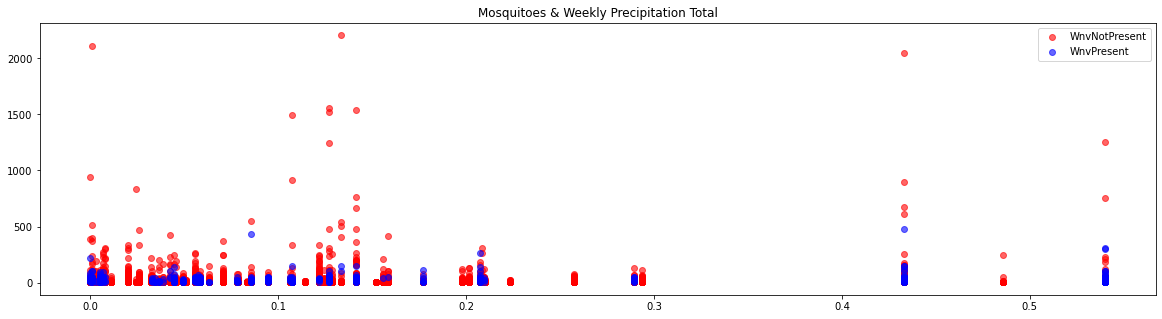

In [47]:
#Looking at the mosquitoes presence based on weekly precipitation total
plt.figure(figsize=(20,5))
plt.scatter(data=combined_df.loc[combined_df['WnvPresent']==0], x = 'WeekPrecipTotal', y='NumMosquitos', c='r', alpha=0.6, label='WnvNotPresent')
plt.scatter(data=combined_df.loc[combined_df['WnvPresent']==1], x = 'WeekPrecipTotal', y='NumMosquitos', c='b', alpha=0.6, label='WnvPresent')
plt.title('Mosquitoes & Weekly Precipitation Total')
plt.legend();

Based on the bar plot above, the precipitation level with the highest count of mosquitoes is 0.09. Despite that, the precipitation level with highest count of Wnv mosquitoes is at 0.88. 

Precipitation is a double-edge sword when it comes to mosquitoes. Higher precipitation (in other words higher frequency of rainfall) might affect mosquitoes' flight, rendering them to unable to fly and breed. However, it might also create puddles of water which will be breeding places for mosquitoes.

#### Sunlight Duration Vs Wnv Mosquitoes

Below here, we will study the relation between the sunlight duration and the Wnv Mosquitoes. Mosquitoes will usually lay eggs and breed in the night. Therefore, sunlight duration is a important factor.

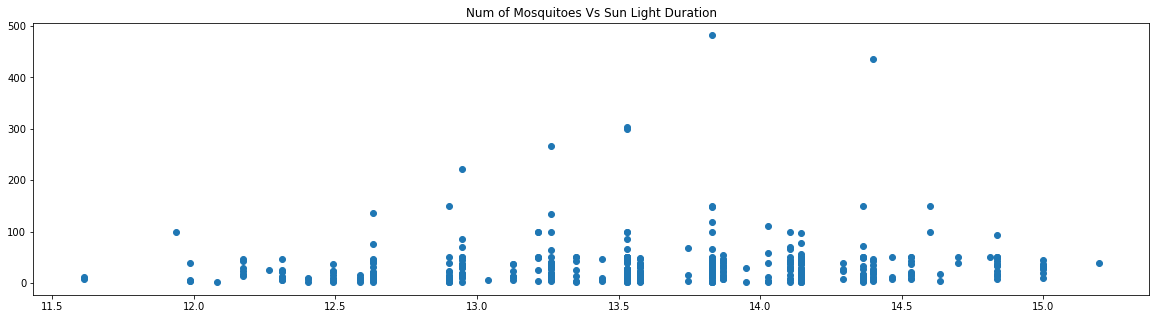

In [30]:
plt.figure(figsize=(20,5))
plt.scatter(data = wnvpresent_df,x = 'WeekSunHours',y='NumMosquitos')
plt.title('Num of Mosquitoes Vs Sun Light Duration');

It seemed that most of the Wnv Mosquitoes appear when there are around 13 - 14.5 hours of sunlight, when there are 10 - 11 hours of night.

#### Correlation between Wnv Present & All Features

Below, let's look at the features correlation with the WnvPresent.

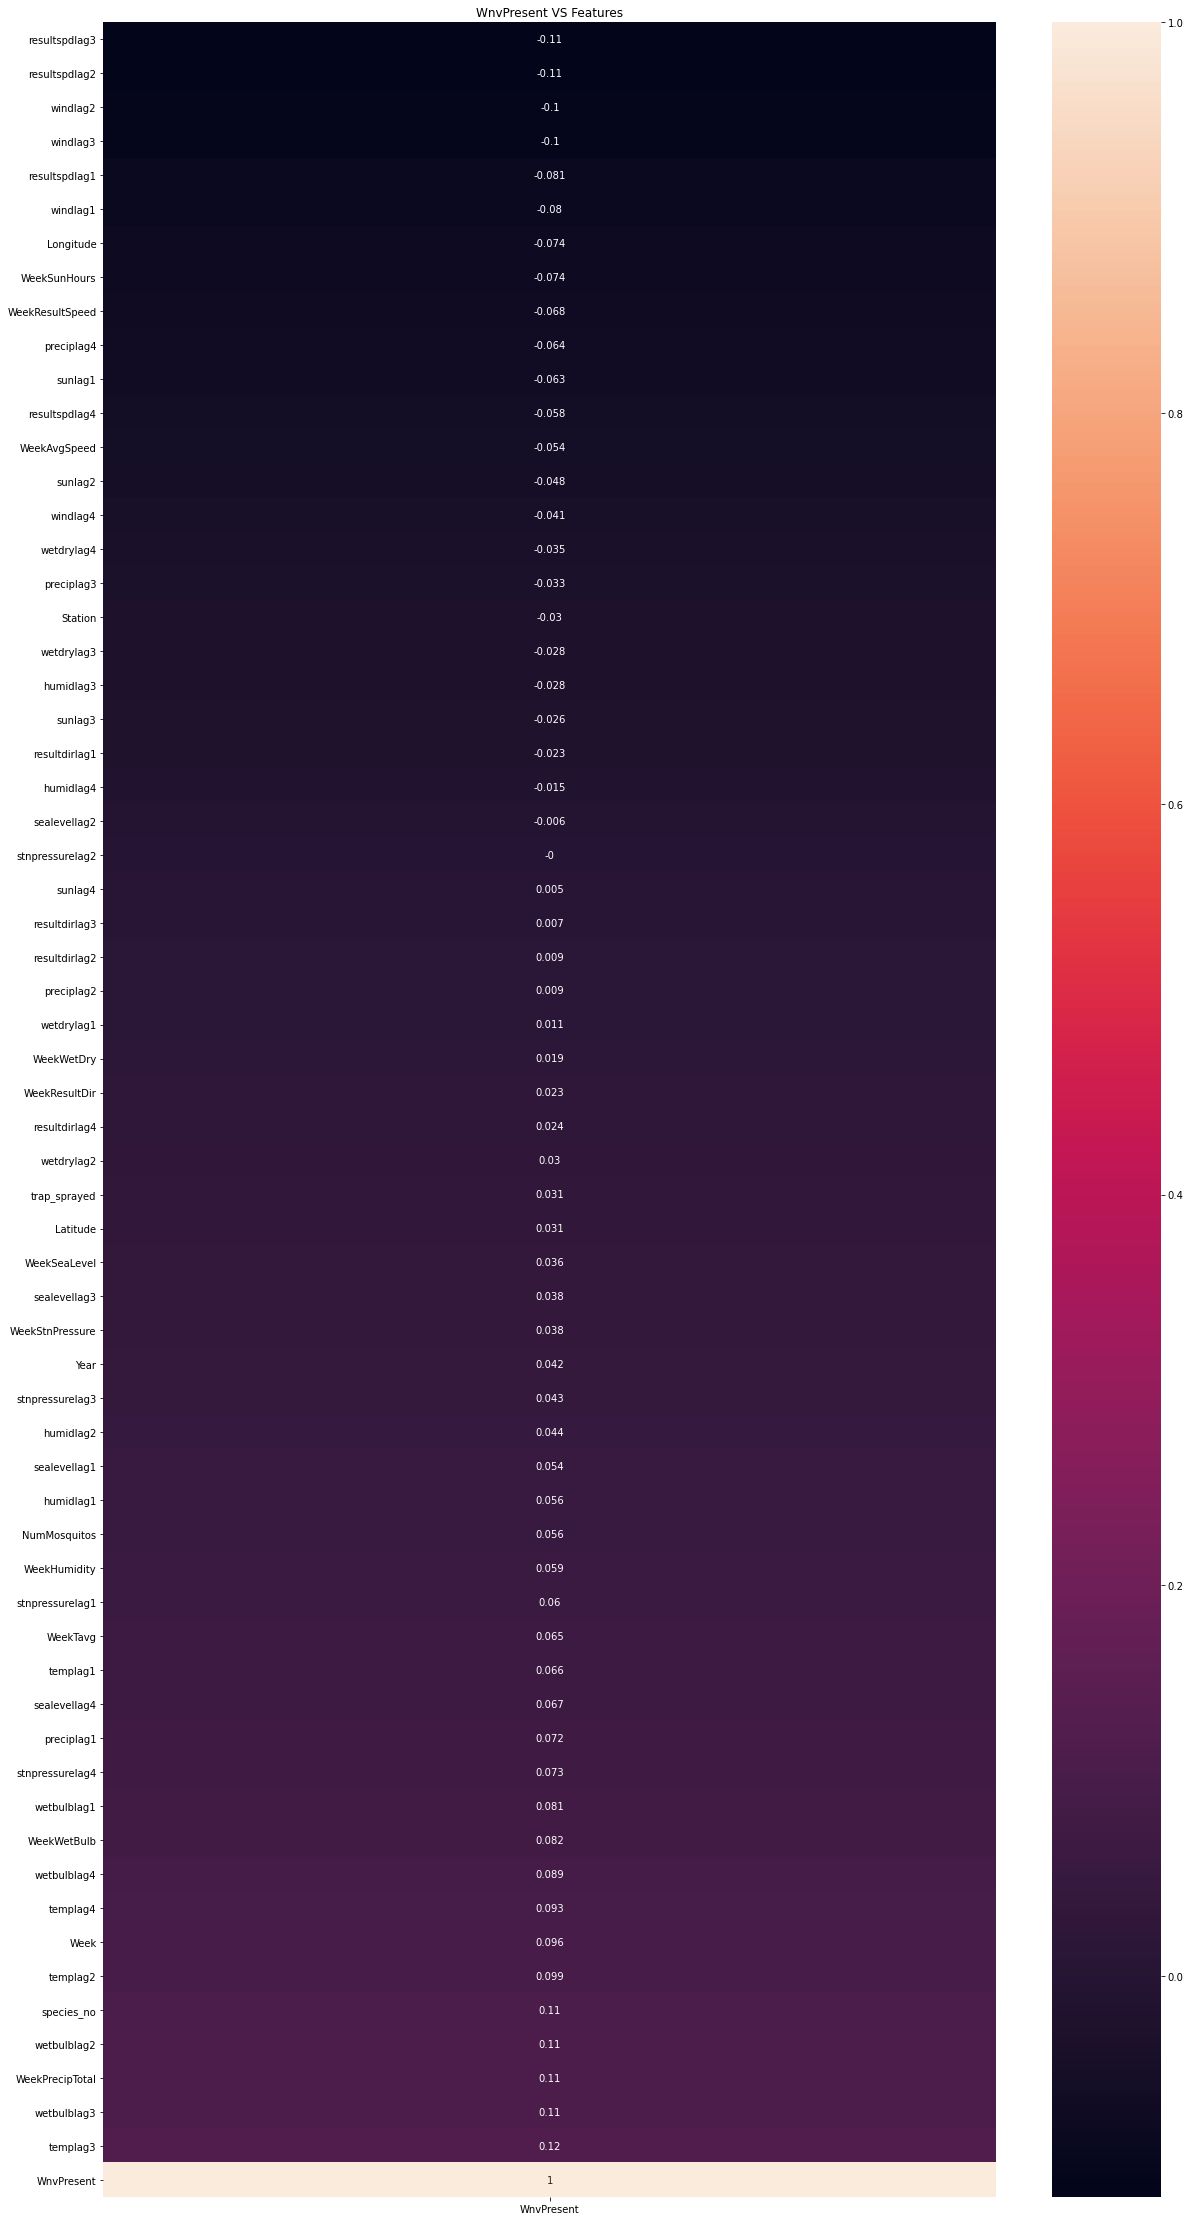

In [31]:
#Plotting the correlation heatmap again
plt.figure(figsize=(20,40))
sns.heatmap(round(combined_df.corr()[['WnvPresent']].sort_values('WnvPresent'),3), annot=True)
plt.title('WnvPresent VS Features');

Based on the above correlation table, the wind result speed and sunlight duration are very negatively correlated whereas the average temperature and the rain, are very positively correlated. It can be due to the temperature being high averagely over the weeks, and there are high amount of rain over the weeks. 

Let's analyze these weather conditions again.

In [32]:
windlag = combined_df.loc[combined_df['WnvPresent'] == 1,['NumMosquitos','WeekResultSpeed','resultspdlag1','resultspdlag2',
                                                          'resultspdlag3','resultspdlag4']]
windlag.sample(10)

NumMosquitos  WeekResultSpeed  resultspdlag1  resultspdlag2  \
1789            18         4.185714       5.628571       3.071429   
7164             7         6.700000       6.800000       7.442857   
8050            30         6.671429       6.242857       5.485714   
8052            41         6.671429       6.242857       5.485714   
1160            29         3.071429       4.557143       5.100000   
6185             3         6.357143      10.014286       4.871429   
7643            11         6.228571       4.600000       7.771429   
1527             6         4.185714       5.628571       3.071429   
1652             7         4.185714       5.628571       3.071429   
1324             1         5.628571       3.071429       4.557143   

      resultspdlag3  resultspdlag4  
1789       4.557143       5.100000  
7164       8.442857       7.128571  
8050       6.228571       4.600000  
8052       6.228571       4.600000  
1160       6.985714       6.242857  
6185       5.442857       3.928571  
7643       6.700000       6.800000  
1527       4.557143       5.100000  
1652       4.557143       5.100000  
1324       5.100000       6.985714

In [33]:
windlag.describe()

NumMosquitos  WeekResultSpeed  resultspdlag1  resultspdlag2  \
count    457.000000       457.000000     457.000000     457.000000   
mean      31.770241         5.696093       5.722601       5.516849   
std       44.871768         1.228768       1.374235       1.590020   
min        1.000000         3.071429       3.071429       3.071429   
25%        9.000000         4.557143       4.642857       4.557143   
50%       21.000000         6.071429       5.628571       5.485714   
75%       40.000000         6.671429       6.400000       6.671429   
max      482.000000         8.442857      10.014286      10.014286   

       resultspdlag3  resultspdlag4  
count     457.000000     457.000000  
mean        5.771491       5.994811  
std         1.128102       1.176207  
min         3.071429       3.071429  
25%         4.600000       5.100000  
50%         5.628571       6.242857  
75%         6.700000       6.985714  
max         8.442857       9.271429

Based on the above comparison for wind speed, the range of the weekly average is 5.27 to 10.20. Areas with higher average tend to have lesser mosquitoes, compared to the lower averages ones. This might be able to explain the negative correlation as mosquitoes is unable to thrive as well in high wind speed conditions.

In [34]:
sunlag = combined_df.loc[combined_df['WnvPresent'] == 1,['NumMosquitos','WeekSunHours','sunlag1',
                                                         'sunlag2','sunlag3','sunlag4']]
sunlag.sample(10)

NumMosquitos  WeekSunHours    sunlag1    sunlag2    sunlag3    sunlag4
1558             8     13.530952  13.828571  14.104762  14.364286  14.600000
7831             8     13.869048  14.142857  14.400000  14.633333  14.838095
7931            13     13.576190  13.869048  14.142857  14.400000  14.633333
1649             5     13.530952  13.828571  14.104762  14.364286  14.600000
1294            14     13.828571  14.104762  14.364286  14.600000  14.811905
2069             1     12.902381  13.216667  13.530952  13.828571  14.104762
8032             3     13.576190  13.869048  14.142857  14.400000  14.633333
6284             1     12.492857  12.811905  13.128571  13.440476  13.745238
1741            24     13.530952  13.828571  14.104762  14.364286  14.600000
7642             1     14.142857  14.400000  14.633333  14.838095  14.997619

In [35]:
sunlag.describe()

NumMosquitos  WeekSunHours     sunlag1     sunlag2     sunlag3  \
count    457.000000    457.000000  457.000000  457.000000  457.000000   
mean      31.770241     13.586735   13.866323   14.127774   14.366880   
std       44.871768      0.685283    0.647650    0.600968    0.544369   
min        1.000000     11.611905   11.938095   12.264286   12.585714   
25%        9.000000     13.216667   13.530952   13.828571   14.104762   
50%       21.000000     13.530952   13.828571   14.104762   14.364286   
75%       40.000000     14.104762   14.364286   14.600000   14.811905   
max      482.000000     15.195238   15.207143   15.195238   15.207143   

          sunlag4  
count  457.000000  
mean    14.578243  
std      0.478166  
min     12.902381  
25%     14.364286  
50%     14.600000  
75%     14.976190  
max     15.209524

Based on the above comparison for the sunlight hours, the range of the weekly average is between 11 to 15 hours. Despite the fact where longer nights should increase mosquito activity (a.k.a. lower sunlight hours), it did not apply here in the above comparison. There are entries where there were long sunlight hours but higher number of mosquitoes as compared to entries with short sunlight hours. 

This may be due to other weather conditions that might have a higher impact of the number of mosquitoes as compared to the sunlight hours.

In [36]:
templag = combined_df.loc[combined_df['WnvPresent'] == 1,['NumMosquitos','WeekTavg','templag1','templag2','templag3','templag4']]
templag.head()

NumMosquitos   WeekTavg   templag1   templag2   templag3   templag4
524            50  72.285714  73.714286  76.285714  72.428571  72.142857
570           150  75.142857  72.285714  73.714286  76.285714  72.428571
571           100  75.142857  72.285714  73.714286  76.285714  72.428571
665            71  78.714286  75.142857  72.285714  73.714286  76.285714
677            50  78.714286  75.142857  72.285714  73.714286  76.285714

In [37]:
templag.describe()

NumMosquitos    WeekTavg    templag1    templag2    templag3  \
count    457.000000  457.000000  457.000000  457.000000  457.000000   
mean      31.770241   73.999375   73.990309   75.508909   75.412629   
std       44.871768    4.853456    4.468096    4.298657    4.318387   
min        1.000000   59.571429   59.571429   59.571429   59.571429   
25%        9.000000   71.857143   71.857143   72.285714   72.285714   
50%       21.000000   74.857143   72.428571   75.142857   75.142857   
75%       40.000000   76.571429   76.428571   79.428571   78.714286   
max      482.000000   84.142857   85.571429   85.571429   85.571429   

         templag4  
count  457.000000  
mean    74.582369  
std      3.664601  
min     65.857143  
25%     72.285714  
50%     74.857143  
75%     76.428571  
max     85.571429

Based on the above comparison, the average for the past 4 weeks ranged around 59 to 84 degree Fahrenheit. This explains the positive correlation of the temperature and presence of the West Nile virus, as higher temperature will cause mosquitoes to appear more.  

In [38]:
preciplag = combined_df.loc[combined_df['WnvPresent'] == 1,['NumMosquitos','WeekPrecipTotal','preciplag1','preciplag2','preciplag3','preciplag4']]
preciplag.sample(10)

NumMosquitos  WeekPrecipTotal  preciplag1  preciplag2  preciplag3  \
6398            16         0.049286    0.026429    0.032857    0.057143   
8011             4         0.058571    0.094286    0.005000    0.085714   
1871            14         0.540000    0.432857    0.127143    0.141429   
1455            14         0.432857    0.127143    0.141429    0.133571   
8308            15         0.044286    0.000000    0.207143    0.058571   
7277            33         0.006429    0.121429    0.010714    0.155714   
1513           148         0.432857    0.127143    0.141429    0.133571   
1575            17         0.540000    0.432857    0.127143    0.141429   
1524             9         0.540000    0.432857    0.127143    0.141429   
1300             1         0.432857    0.127143    0.141429    0.133571   

      preciplag4  
6398    0.057143  
8011    0.002857  
1871    0.133571  
1455    0.158571  
8308    0.094286  
7277    0.032143  
1513    0.158571  
1575    0.133571  
1524    0.133571  
1300    0.158571

In [39]:
preciplag.describe()

NumMosquitos  WeekPrecipTotal  preciplag1  preciplag2  preciplag3  \
count    457.000000       457.000000  457.000000  457.000000  457.000000   
mean      31.770241         0.187621    0.147848    0.108314    0.107937   
std       44.871768         0.194922    0.149079    0.115361    0.101163   
min        1.000000         0.000000    0.000000    0.000000    0.000000   
25%        9.000000         0.044286    0.044286    0.020000    0.032857   
50%       21.000000         0.106429    0.094286    0.094286    0.094286   
75%       40.000000         0.432857    0.195714    0.141429    0.141429   
max      482.000000         0.540000    0.540000    0.540000    0.540000   

       preciplag4  
count  457.000000  
mean     0.093401  
std      0.075456  
min      0.000714  
25%      0.025714  
50%      0.094286  
75%      0.133571  
max      0.540000

Based on the above comparison, the average for the past 4 weeks for the precipitation ranged around 0 to 0.54 in. The amount of precipitation is inconsistent for different areas. Places with higher and consistent average precipitation for the past 4 weeks tend to have more mosquitoes.


Despite looking into individual conditions, it does not take one condition to contribute to the number of mosquitoes. Sometimes, it can be due to different combination of the various weather conditions.

### One-Hot Encode Traps

We will be one-hot encoding the traps feature as it will be easier for us to analyze.

In [40]:
combined_df = pd.get_dummies(data=combined_df,columns=['Trap'])

In [41]:
combined_df.shape

(8610, 202)

Text(0.5, 1.0, 'WnvPresent VS Features')

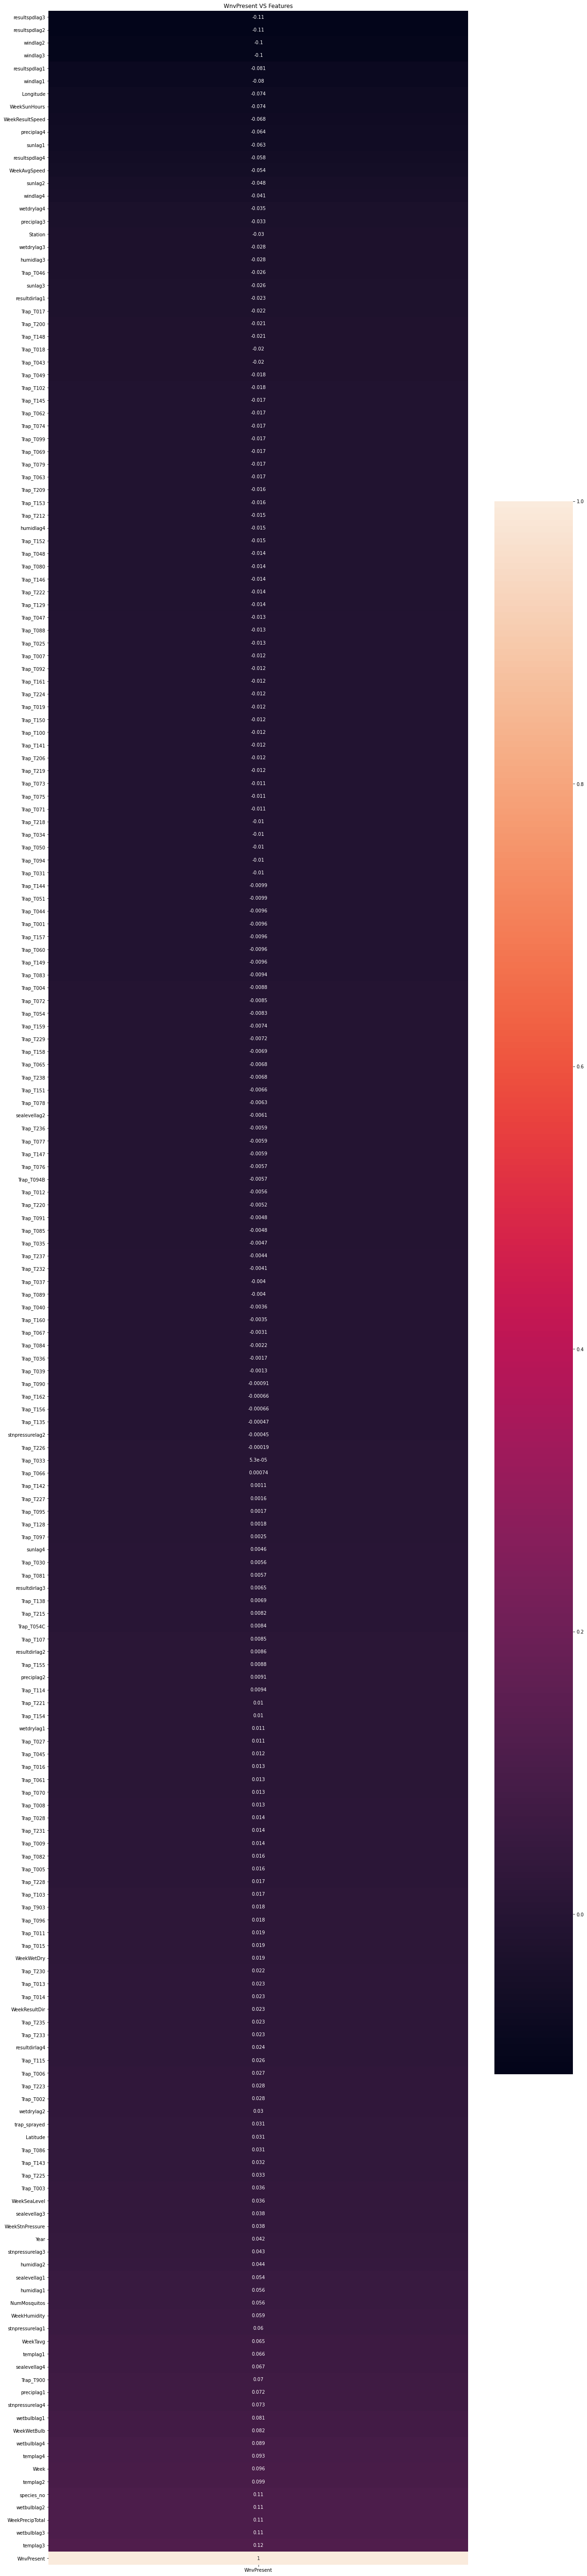

In [42]:
#Plotting the correlation heatmap again
plt.figure(figsize=(20,100))
sns.heatmap(combined_df.corr()[['WnvPresent']].sort_values('WnvPresent'), annot=True)
plt.title('WnvPresent VS Features')

So we will be dropping the below features for our model training as they are not very significant for prediction of Wnv mosquitoes.

In [43]:
#Dropping unused features
combined_train_df = combined_df.drop(columns=['Week','Year','Station', 'NumMosquitos', 
                                              'Species','Latitude','Longitude'])

In [44]:
#Looking at the final dataset 
combined_train_df.head()

Date  WnvPresent  species_no  trap_sprayed   WeekTavg  WeekWetBulb  \
0 2007-05-29           0         2.0             0  74.142857    64.714286   
1 2007-05-29           0         1.0             0  74.142857    64.714286   
2 2007-05-29           0         1.0             0  74.142857    64.714286   
3 2007-05-29           0         2.0             0  74.142857    64.714286   
4 2007-05-29           0         1.0             0  74.142857    64.714286   

   WeekWetDry  WeekPrecipTotal  WeekStnPressure  WeekSeaLevel  \
0    0.714286         0.152143        29.267143     29.921429   
1    0.714286         0.152143        29.267143     29.921429   
2    0.714286         0.152143        29.267143     29.921429   
3    0.714286         0.152143        29.267143     29.921429   
4    0.714286         0.152143        29.267143     29.921429   

   WeekResultSpeed  WeekResultDir  WeekAvgSpeed  WeekSunHours  WeekHumidity  \
0              6.6      17.142857      7.585714     14.980952     57.142857   
1              6.6      17.142857      7.585714     14.980952     57.142857   
2              6.6      17.142857      7.585714     14.980952     57.142857   
3              6.6      17.142857      7.585714     14.980952     57.142857   
4              6.6      17.142857      7.585714     14.980952     57.142857   

    templag1   templag2   templag3   templag4  wetbulblag1  wetbulblag2  \
0  68.714286  61.571429  64.571429  60.333333         58.0    50.571429   
1  68.714286  61.571429  64.571429  60.333333         58.0    50.571429   
2  68.714286  61.571429  64.571429  60.333333         58.0    50.571429   
3  68.714286  61.571429  64.571429  60.333333         58.0    50.571429   
4  68.714286  61.571429  64.571429  60.333333         58.0    50.571429   

   wetbulblag3  wetbulblag4  wetdrylag1  wetdrylag2  wetdrylag3  wetdrylag4  \
0    54.714286         50.0    0.571429    0.428571    0.285714    0.166667   
1    54.714286         50.0    0.571429    0.428571    0.285714    0.166667   
2    54.714286         50.0    0.571429    0.428571    0.285714    0.166667   
3    54.714286         50.0    0.571429    0.428571    0.285714    0.166667   
4    54.714286         50.0    0.571429    0.428571    0.285714    0.166667   

   preciplag1  preciplag2  preciplag3  preciplag4  stnpressurelag1  \
0       0.065    0.111429    0.003571    0.000833        29.448571   
1       0.065    0.111429    0.003571    0.000833        29.448571   
2       0.065    0.111429    0.003571    0.000833        29.448571   
3       0.065    0.111429    0.003571    0.000833        29.448571   
4       0.065    0.111429    0.003571    0.000833        29.448571   

   stnpressurelag2  stnpressurelag3  stnpressurelag4  sealevellag1  \
0        29.422857        29.402857            29.42     30.097143   
1        29.422857        29.402857            29.42     30.097143   
2        29.422857        29.402857            29.42     30.097143   
3        29.422857        29.402857            29.42     30.097143   
4        29.422857        29.402857            29.42     30.097143   

   sealevellag2  sealevellag3  sealevellag4  resultspdlag1  resultspdlag2  \
0         30.08     30.062857     30.071667       8.042857       9.285714   
1         30.08     30.062857     30.071667       8.042857       9.285714   
2         30.08     30.062857     30.071667       8.042857       9.285714   
3         30.08     30.062857     30.071667       8.042857       9.285714   
4         30.08     30.062857     30.071667       8.042857       9.285714   

   resultspdlag3  resultspdlag4  resultdirlag1  resultdirlag2  resultdirlag3  \
0       6.814286      10.666667      15.428571      18.714286      12.714286   
1       6.814286      10.666667      15.428571      18.714286      12.714286   
2       6.814286      10.666667      15.428571      18.714286      12.714286   
3       6.814286      10.666667      15.428571      18.714286      12.714286   
4       6.814286      10.666667      15.42

In [45]:
combined_train_df.shape

(8610, 195)

In [46]:
# Save cleaned dataset as a pickle file
outfile = open('../datasets/combined_training.pkl','wb')
pickle.dump(combined_train_df, outfile)
outfile.close()

After cleaning and analyzing the data, we have our combined data set ready for model training.